<a href="https://colab.research.google.com/github/sahilfaizal01/FMCG-Shopper-Analytics-Unveiling-Customer-Trends/blob/main/Predictive_Analysis_Purchase_Incidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

# **Data Preparation**

In [51]:
df_purchase = pd.read_csv('/content/drive/MyDrive/Customer-Analytics/purchase data.csv')
scaler = pickle.load(open('/content/drive/MyDrive/Customer-Analytics/scaler.pkl', 'rb'))
pca = pickle.load(open('/content/drive/MyDrive/Customer-Analytics/pca.pkl', 'rb'))
kmeans_pca = pickle.load(open('/content/drive/MyDrive/Customer-Analytics/kmeans_pca.pkl', 'rb'))
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

# **Purchase Probability Model**

In [52]:
Y = df_pa['Incidence']

In [53]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [54]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [55]:
model_purchase.coef_

array([[-2.34752123]])

### The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.


# **Price Elasticity of Purchase Probability**

In [56]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [57]:
# Introducing the price range for which we'll examine the purchase probability.
# Choosing a price range between 0.5 and 3.49, which somewhat expands the actual observed price range,
# which is from 1.1 to 2.8.
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [58]:
df_price_range = pd.DataFrame(price_range)

In [59]:
Y_pr = model_purchase.predict_proba(df_price_range)
Y_pr[:5] # 0th index - no purchase probability, 1st index - purchase probability

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.08212811, 0.91787189],
       [0.0839152 , 0.9160848 ],
       [0.08573753, 0.91426247],
       [0.08759566, 0.91240434],
       [0.08949011, 0.91050989]])

In [60]:
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [61]:
# Create price elasticities master data frame.
df_price_elasticities = pd.DataFrame(price_range)

In [62]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096399
1,0.51,-0.100466
2,0.52,-0.104661
3,0.53,-0.108985
4,0.54,-0.113443
5,0.55,-0.118038
6,0.56,-0.122772
7,0.57,-0.127649
8,0.58,-0.132673
9,0.59,-0.137847


In [63]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096399
1,0.51,-0.100466
2,0.52,-0.104661
3,0.53,-0.108985
4,0.54,-0.113443
5,0.55,-0.118038
6,0.56,-0.122772
7,0.57,-0.127649
8,0.58,-0.132673
9,0.59,-0.137847


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

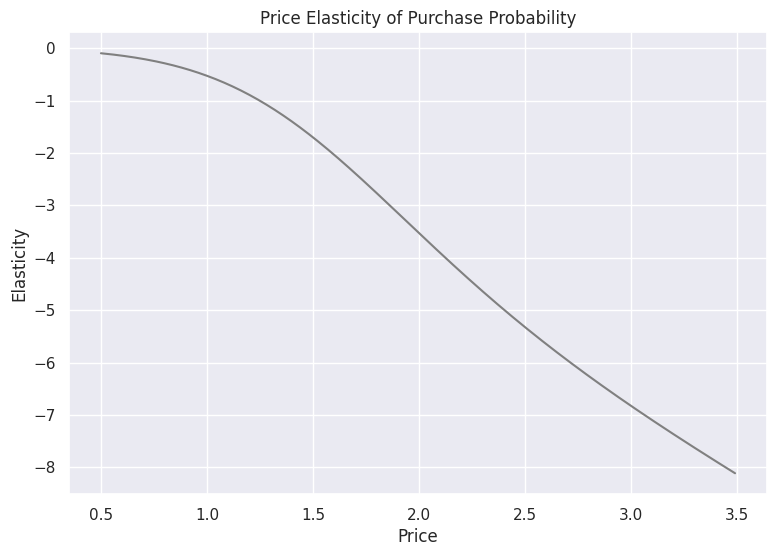

In [64]:
# Display the price elasticity of purchase probability of the average customer.
# Observe that the price elasticities are all negative.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## **Observations:**

*   ### As a function price elasticity decreases as price increases. The higher the price of a product becomes, the less likely it will be for people to buy it
*   ### Decrease in price is slower between 0.5 and 1.1 and becomes steeper after 1.1 mark
* ### Price elasticities are all negative as we use the model's coefficient to calculate them, indicating inverse proportionality between price and purchase probability - hence price elasticities are negative as well
* ### Elasticity measures percentage change in output variable (purchase probability) given a percent change in input variable (price). If this percentage change > 100% then we say output is elastic else inelastic. ie;|E| < 1 means inelastic
* ### E is less than one for price range 1.10 which means for 1% increase in price, prob of purchase decrease by 0.69%. ie; increase of 1% in price leads to decrease of less than 1% -> inelastic
* ### E is > 1 for price range 1.50 which means 1% increase in price, prob of purchase decrease by 1.7% (2% approx) -> elastic
* ### For inelastic values the general recommendation is to increase the prices and decrease in case of elastic values
* ### At 1.25 mark prices becomes elastic



# **Purchase Probability by Segments**

### $\color{green}{\text{Segment 1 - Career-Focused}}$

In [65]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,3,False,False,False,True
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,False,False,False,True
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,False,False,False,True
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,3,False,False,False,True
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,3,False,False,False,True


In [66]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [67]:
Y = df_pa_segment_1['Incidence']

In [68]:
X = pd.DataFrame()

In [69]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] +
                   df_pa_segment_1['Price_5']) / 5

In [70]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [71]:
model_incidence_segment_1.coef_

array([[-1.71170571]])

In [72]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

In [74]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096399,-0.119071
1,0.51,-0.100466,-0.123253
2,0.52,-0.104661,-0.127528
3,0.53,-0.108985,-0.131898
4,0.54,-0.113443,-0.136365
5,0.55,-0.118038,-0.140929
6,0.56,-0.122772,-0.145592
7,0.57,-0.127649,-0.150356
8,0.58,-0.132673,-0.155223
9,0.59,-0.137847,-0.160193


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

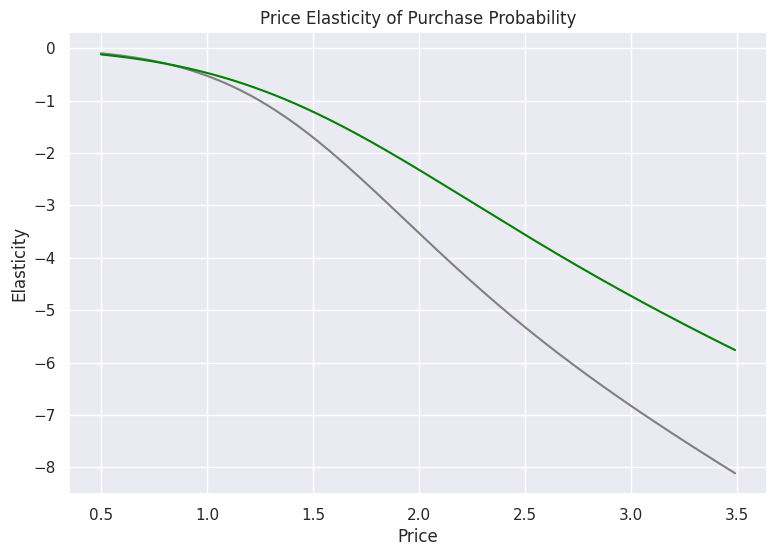

In [75]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## We can see from the plot that at 1.39 USD the career focused becomes elastic which is higher than mean of 1.25 USD. The purhase prob of career focused are less elastic than average

### $\color{red}{\text{Segment 3 - Fewer-Opportunities}}$

In [76]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

In [77]:
# Logistic regression model
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] +
                   df_pa_segment_3['Price_2'] +
                   df_pa_segment_3['Price_3'] +
                   df_pa_segment_3['Price_4'] +
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

# Calculate price elasticities
model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range * ( 1- purchase_pr_segment3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [78]:
df_price_elasticities['PE_Segment_3'] = pe_segment3

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

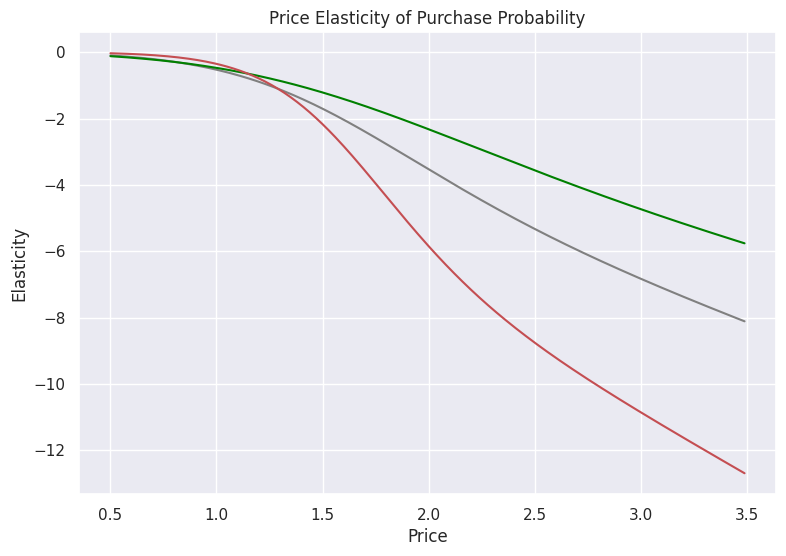

In [79]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment3, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{blue}{\text{Segment 0 - Standard}}$

In [80]:
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] +
                   df_pa_segment_0['Price_2'] +
                   df_pa_segment_0['Price_3'] +
                   df_pa_segment_0['Price_4'] +
                   df_pa_segment_0['Price_5']) / 5
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### $\color{orange}{\text{Segment 2 - Well-Off}}$

In [81]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] +
                   df_pa_segment_2['Price_2'] +
                   df_pa_segment_2['Price_3'] +
                   df_pa_segment_2['Price_4'] +
                   df_pa_segment_2['Price_5']) / 5
model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range *( 1- purchase_pr_segment2)
df_price_elasticities['PE_Segment_2'] = pe_segment2
df_price_elasticities

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_3,PE_Segment_2
0,0.50,-0.096399,-0.211201,-0.119071,-0.030924,-0.168024
1,0.51,-0.100466,-0.217773,-0.123253,-0.032691,-0.172948
2,0.52,-0.104661,-0.224452,-0.127528,-0.034546,-0.177942
3,0.53,-0.108985,-0.231239,-0.131898,-0.036491,-0.183008
4,0.54,-0.113443,-0.238136,-0.136365,-0.038531,-0.188144
5,0.55,-0.118038,-0.245143,-0.140929,-0.040670,-0.193353
6,0.56,-0.122772,-0.252261,-0.145592,-0.042912,-0.198634
7,0.57,-0.127649,-0.259490,-0.150356,-0.045263,-0.203987
8,0.58,-0.132673,-0.266832,-0.155223,-0.047726,-0.209414
9,0.59,-0.137847,-0.274286,-0.160193,-0.050307,-0.214914


### ${\textbf{Results}}$

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

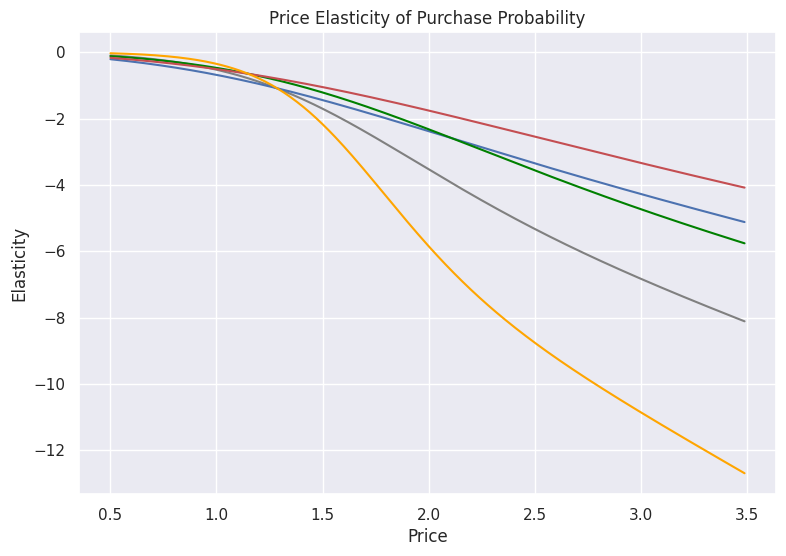

In [82]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

* ### We observe that the Career-focused segment are the least elastic when compared to the rest.
* ### So, their purchase probability elasticity is not as affected by price.
* ### The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that the standard segment is least homogenous, which we discovered during our descriptive analysis.
* ### It may be that the customers in this segment have different shopping habbits, which is why their customers start with being more elastic than average but then shift to being more inelastic than the average customer and indeed the Career-focused segment.

# **Purchase Probability with Promotion Feature**

In [83]:
Y = df_pa['Incidence']

In [84]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5

In [85]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [86]:
# The coefficient for promotion is positive.
# Therefore, there is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49394425,  0.56153899]])

# **Price Elasticity with Promotion**

In [87]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [88]:
df_price_elasticity_promotion['Promotion'] = 1

In [90]:
df_price_elasticity_promotion.head()

,Price_Range,Promotion
0,0.50,1
1,0.51,1
2,0.52,1
3,0.53,1
4,0.54,1


In [91]:
df_price_elasticity_promotion.columns = ['Mean_Price','Mean_Promotion']

In [92]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [93]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [94]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_3,PE_Segment_2,Elasticity_Promotion_1
0,0.50,-0.096399,-0.211201,-0.119071,-0.030924,-0.168024,-0.125735
1,0.51,-0.100466,-0.217773,-0.123253,-0.032691,-0.172948,-0.129851
2,0.52,-0.104661,-0.224452,-0.127528,-0.034546,-0.177942,-0.134046
3,0.53,-0.108985,-0.231239,-0.131898,-0.036491,-0.183008,-0.138321
4,0.54,-0.113443,-0.238136,-0.136365,-0.038531,-0.188144,-0.142677
5,0.55,-0.118038,-0.245143,-0.140929,-0.040670,-0.193353,-0.147115
6,0.56,-0.122772,-0.252261,-0.145592,-0.042912,-0.198634,-0.151636
7,0.57,-0.127649,-0.259490,-0.150356,-0.045263,-0.203987,-0.156240
8,0.58,-0.132673,-0.266832,-0.155223,-0.047726,-0.209414,-0.160930
9,0.59,-0.137847,-0.274286,-0.160193,-0.050307,-0.214914,-0.165705


# **Price Elasticity without Promotion**

In [95]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [96]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [98]:
df_price_elasticity_promotion_no.columns = ['Mean_Price','Mean_Promotion']

In [99]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [100]:
no_promo = Y_no_promo[: , 1]

In [101]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [102]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

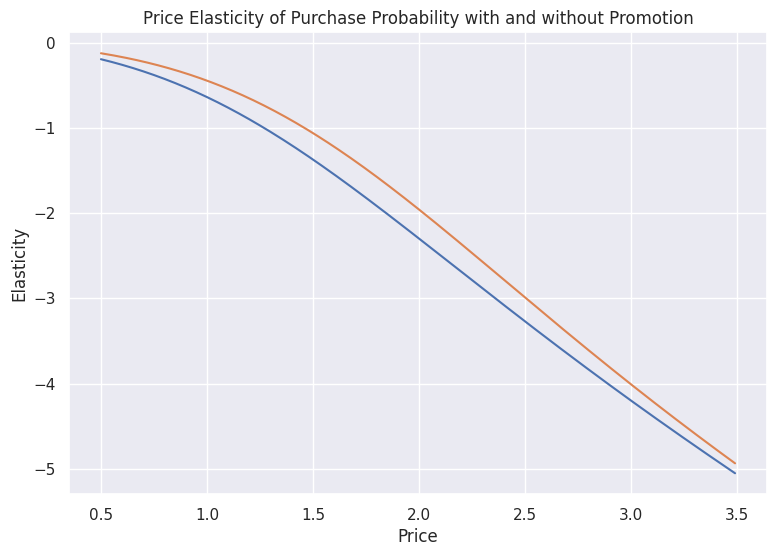

In [103]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

## **Observation:**
* ### Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion
* ### This is an important insight for marketers, as according to our model people are more likely to buy a product if there is some promotional activity rather than purchase a product with the same price, when it isn't on promotion.